In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv('MLR-insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [27]:
set(data.region)

{'northeast', 'northwest', 'southeast', 'southwest'}

In [28]:
gender = {'male': 1, 'female': 2}
smoke = {'no': 0, 'yes': 1}
reg = {'northeast': 1, 'southeast': 2, 'southwest': 3, 'northwest': 4}

data.sex = [gender[item] for item in data.sex]
data.smoker = [smoke[item] for item in data.smoker]
data.region = [reg[item] for item in data.region]

In [29]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,0.204783,2.486547,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [30]:
import seaborn as sns

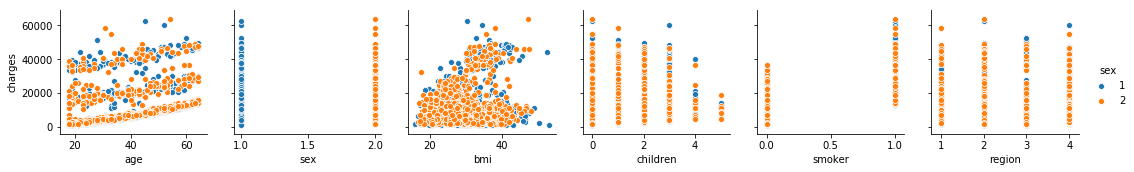

In [31]:
g = sns.pairplot(data, x_vars=["age", "sex", "bmi", "children", "smoker", "region"],
                 y_vars=["charges"], hue="sex")

In [32]:
# data.drop(['sex', 'region'], axis = 1, inplace=True)

# data.head()

In [33]:
m = len(data)
n = len(data.columns) - 1

X = data.iloc[:, :-1].to_numpy().reshape((m, n))
y = data.iloc[:, -1].to_numpy().reshape((m, 1))

In [34]:
def hyp(theta, X):
    return X @ theta

In [35]:
def cost(theta, X, y, m):
    J = np.sum(np.square(hyp(theta, X) - y)) / (2 * m)
    return J

In [36]:
def train_model(theta, X, y, m, lr = 0.0001):
    J = []
    cost0 = cost(theta, X, y, m)
    J.append(cost0)
    for i in range(100000):
        delta = X.T @ (hyp(theta, X) - y) / m
        theta = theta - lr * delta
        
        cost1 = cost(theta, X, y, m)
        J.append(cost1)
        if cost1 == 0 or cost1 > cost0:
            print(i)
            break
        cost0 = cost1
    
    return J, theta

In [37]:
def train_test_split(X, y, s = 0.3):
    assert(X.shape[0] == y.shape[0])
    m = X.shape[0]
    val = int(m - m * s)
    
    indices = np.arange(m)
    np.random.shuffle(indices)

    A = X[indices]
    B = y[indices]
    
    X_train = A[:val + 1]
    y_train = B[:val + 1]
    
    X_test = A[val + 1:]
    y_test = B[val + 1:]
    
    return X_train, y_train, X_test, y_test

In [38]:
ones = np.ones((m, 1))

X = np.concatenate((ones, X), axis = 1)

X.shape

(1338, 7)

In [39]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [40]:
# theta = np.zeros((X.shape[1], 1))
theta = np.array([[-12490.0], [260.0], [360.0], [320.0], [440.0], [24000.0], [-150.0]])
m = X_train.shape[0]
J, theta = train_model(theta, X_train, y_train, m)

# theta = np.linalg.inv(X.T @ X) @ X.T @ y

theta

array([[-12039.60169736],
       [   257.78039376],
       [   129.50258634],
       [   321.38134389],
       [   477.78663538],
       [ 23811.62382151],
       [   -98.27183477]])

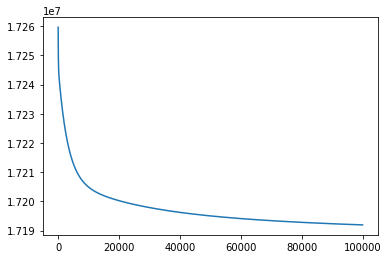

In [24]:
plt.plot(J)

In [25]:
min(J)

17191931.2705818

In [41]:
y_pred = X_test @ theta
sq_err = 0.0
n = X_test.shape[0]

for i in range(n):
    err = np.abs(y_pred[i] - y_test[i])
    sq_err += err[0] ** 2

msq_err = sq_err / n # Mean Squared Error
rmsq_err = np.sqrt(msq_err) # Root Mean Squared Error

rmsq_err

5930.802248043128

In [42]:
mean = np.mean(y_test)
var = 0.0
for i in range(n):
    err = np.abs(y_test[i] - mean)
    var += err[0] ** 2

var = var / (n - 1) # Variance
sd = np.sqrt(var) # Standard Deviation
sd

12008.313046729625

In [43]:
r2 = 1 - msq_err / var
r2 # Root Relative Squared Error

0.756071309210071